In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime

In [2]:
covid19_df =pd.read_csv(r'cleaned_covid19data.csv')
mohfw_df =pd.read_csv(r'cleaned_mohfwdata.csv')
prs_df =pd.read_csv(r'prsindiadata.csv')

In [3]:
covid19_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   State      38 non-null     object
 1   Confirmed  38 non-null     int64 
 2   Deaths     38 non-null     int64 
 3   Recovered  38 non-null     int64 
 4   Active     38 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.6+ KB


In [4]:
mohfw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sno         37 non-null     int64 
 1   state_name  36 non-null     object
 2   active      37 non-null     int64 
 3   positive    37 non-null     int64 
 4   cured       37 non-null     int64 
 5   death       37 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.9+ KB


In [5]:
prs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   State         37 non-null     object
 1   Cases         37 non-null     int64 
 2   Active Cases  37 non-null     int64 
 3   Recovered     37 non-null     int64 
 4   Deaths        37 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.6+ KB


In [6]:
statewise = pd.pivot_table(covid19_df, values = ["Confirmed", "Deaths", "Recovered"], index = "State", aggfunc = max)

In [8]:
statewise = statewise.sort_values(by = "Confirmed", ascending = False)

In [9]:
statewise.style.background_gradient(cmap = "rainbow")

,Confirmed,Deaths,Recovered
State,,,
Total,34285612,458470,33661339
Maharashtra,6611078,140216,6450585
Kerala,4968657,31681,4857181
Karnataka,2988333,38082,2941578
Tamil Nadu,2702623,36116,2655015
Andhra Pradesh,2066450,14373,2047722
Uttar Pradesh,1710158,22900,1687151
West Bengal,1592908,19141,1565471
Delhi,1439870,25091,1414431


In [11]:
top_10_active_cases = covid19_df.groupby(by = 'State').max()[['Active']].sort_values(by = ['Active'], ascending = False).reset_index()

In [12]:
fig = plt.figure(figsize = (16, 9))

<Figure size 1600x900 with 0 Axes>

Text(0.5, 1.0, 'Top 10 states with most active cases in India')

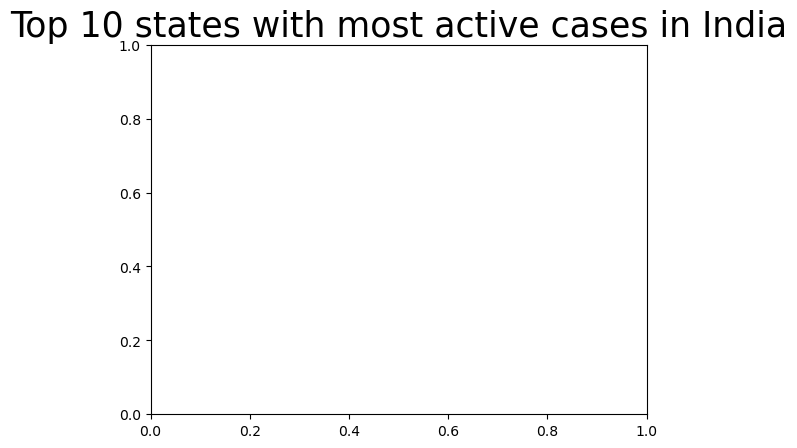

In [13]:
plt.title("Top 10 states with most active cases in India", size = 25)

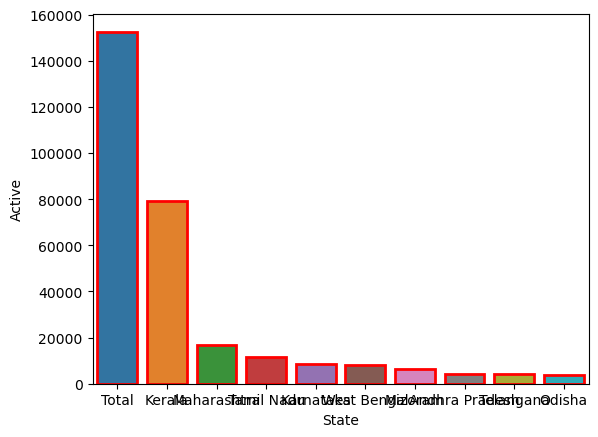

In [14]:
ax = sns.barplot(data = top_10_active_cases.iloc[:10], y = "Active", x = "State", linewidth = 2, edgecolor = 'red')

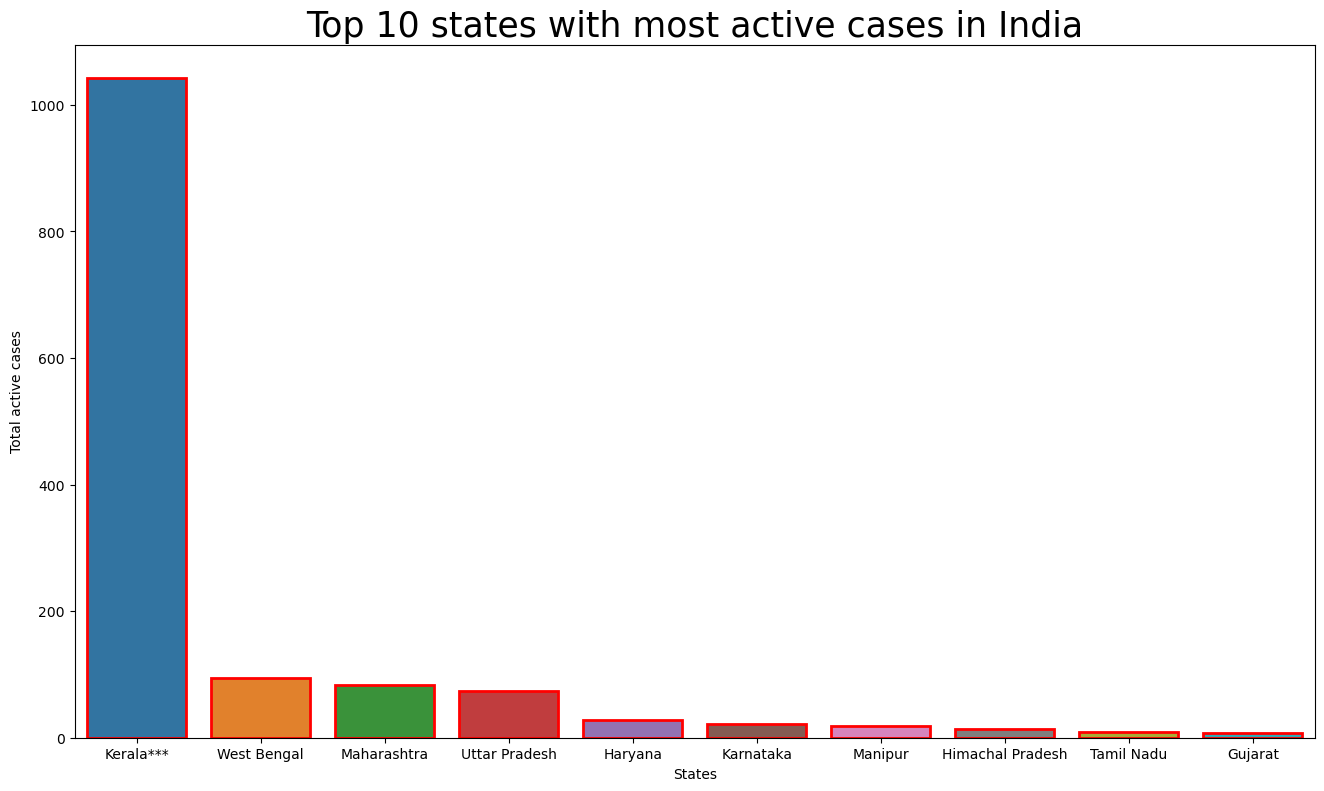

In [15]:
#  Top 10 active cases states

top_10_active_cases = mohfw_df.groupby(by = 'state_name').max()[['active']].sort_values(by = ['active'], ascending = False).reset_index()

fig = plt.figure(figsize = (16, 9))

plt.title("Top 10 states with most active cases in India", size = 25)

ax = sns.barplot(data = top_10_active_cases.iloc[:10], y = "active", x = "state_name", linewidth = 2, edgecolor = 'red')

plt.xlabel("States")
plt.ylabel("Total active cases")
plt.show()

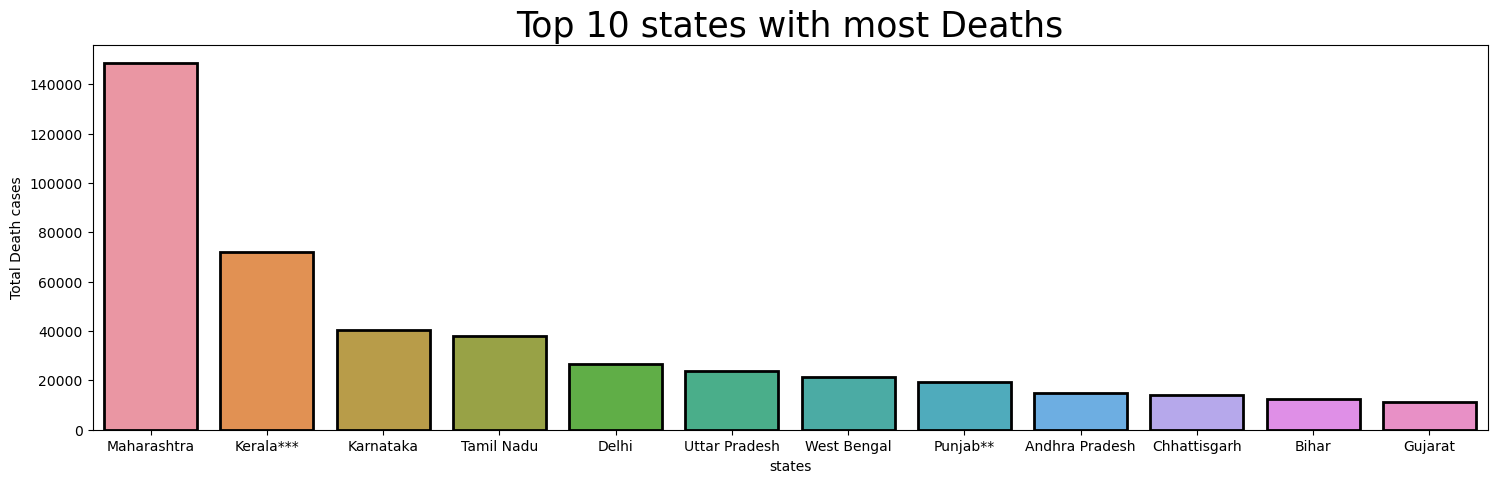

In [16]:
top_10_deaths = mohfw_df.groupby(by='state_name').max()[['death']].sort_values(by='death', ascending=False).reset_index()

fig = plt.figure(figsize = (18,5))

plt.title("Top 10 states with most Deaths", size = 25)

ax = sns.barplot(data = top_10_deaths.iloc[:12], y = "death", x = "state_name", linewidth = 2, edgecolor = "black")

plt.xlabel("states")
plt.ylabel("Total Death cases")
plt.show()